# Circuit Layer Operations Per Second (CLOPS)

In [1]:
%load_ext autoreload
%autoreload 2

## Choose (or define) a backend

In [2]:
backend = "deneb"

## Set IQM Token if using Resonance

In [3]:
import os
os.environ["IQM_TOKEN"] = ""

## CLOPS Configuration

In [4]:
from iqm.benchmarks.quantum_volume.clops import *

In [5]:
EXAMPLE_CLOPS = CLOPSConfiguration(
    qubits=[1,2,5], ## choose the layout of used for successful Quantum volume execution. Note that for Deneb 0 is reserved for the resontor.
    num_circuits=100, # By definition set to 100
    num_updates=10, # By definition set to 10
    num_shots=100, # By definition set to 100
    calset_id=None,
    clops_h_bool=False,
)

## Run the experiment

In [6]:
benchmark_clops = CLOPSBenchmark(backend, EXAMPLE_CLOPS)
run_clops = benchmark_clops.run()

2025-02-08 09:15:26,695 - iqm.benchmarks.logging_config - INFO - NB: CLOPS should be estimated with same qubit layout and optional inputs used to establish QV!
2025-02-08 09:15:26,695 - iqm.benchmarks.logging_config - INFO - Now generating 100 parametrized circuit templates on qubits [1, 2, 5]
2025-02-08 09:15:26,752 - iqm.benchmarks.logging_config - INFO - Will transpile all 100 circuits according to "fixed" physical layout
2025-02-08 09:15:26,753 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQM Backend with optimization level 3, sabre routing method and SQG optimization all circuits
2025-02-08 09:15:31,160 - iqm.benchmarks.logging_config - INFO - CLOPS time started
2025-02-08 09:15:31,161 - iqm.benchmarks.logging_config - INFO - Update 1/10
Assigning random parameters to all 100 circuits
2025-02-08 09:15:31,210 - iqm.benchmarks.logging_config - INFO - Executing the corresponding circuit batch
2025-02-08 09:15:31,210 - iqm.benchmarks.logging_config - INFO - Submitt

## Perform Analysis

In [7]:
result_clops = benchmark_clops.analyze()

2025-02-08 09:18:29,178 - iqm.benchmarks.logging_config - INFO - Total elapsed times from job execution metadata:
2025-02-08 09:18:29,179 - iqm.benchmarks.logging_config - INFO - 	"job_total": 1.54 min
2025-02-08 09:18:29,179 - iqm.benchmarks.logging_config - INFO - 	"compile_total": 14.57 sec
2025-02-08 09:18:29,180 - iqm.benchmarks.logging_config - INFO - 	"submit_total": 3.67 sec
2025-02-08 09:18:29,180 - iqm.benchmarks.logging_config - INFO - 	"execution_total": 1.11 min


### List all the keys in the attributes of the dataset

In [8]:
for k in run_clops.dataset.attrs.keys():
    print(k)

all_times_parameter_assign
all_times_retrieve
all_times_submit
assign_parameters_total
backend_configuration_name
backend_name
benchmark
calset_id
clops_h_bool
clops_time
compile_total
counts_per_update
depth
execution_timestamp
execution_total
job_meta_per_update
job_total
max_gates_per_batch
num_circuits
num_parameters
num_qubits
num_shots
num_updates
operation_counts
optimize_sqg
parallel_2q_layers
parameters_per_update
physical_layout
qiskit_optim_level
qubits
routing_method
session_timestamp
shots
submit_total
time_circuit_generate
time_count_layers
time_sort_batches
time_transpile
u_per_layer
user_retrieve_total
user_submit_total


In [9]:
run_clops.dataset.attrs["operation_counts"]

{'measure': {'Mean': 2.9702970297029703, 'Std': 0.2970297029702968},
 'id': {'Mean': 0.0, 'Std': 0.0},
 'r': {'Mean': 106.7128712871287, 'Std': 10.689438327419744},
 'cz': {'Mean': 8.910891089108912, 'Std': 0.8910891089108915},
 'move': {'Mean': 17.821782178217823, 'Std': 1.782178217821783},
 'barrier': {'Mean': 0.9900990099009901, 'Std': 0.09900990099009897}}

### The observation object contains the benchmark results

In [10]:
result_clops.observations ## import the value of `clops_v` reported below.

{1: {'clops_v': {'value': 1685, 'uncertainty': nan},
  'clops_h': {'value': 0, 'uncertainty': nan}}}

### Generate plots

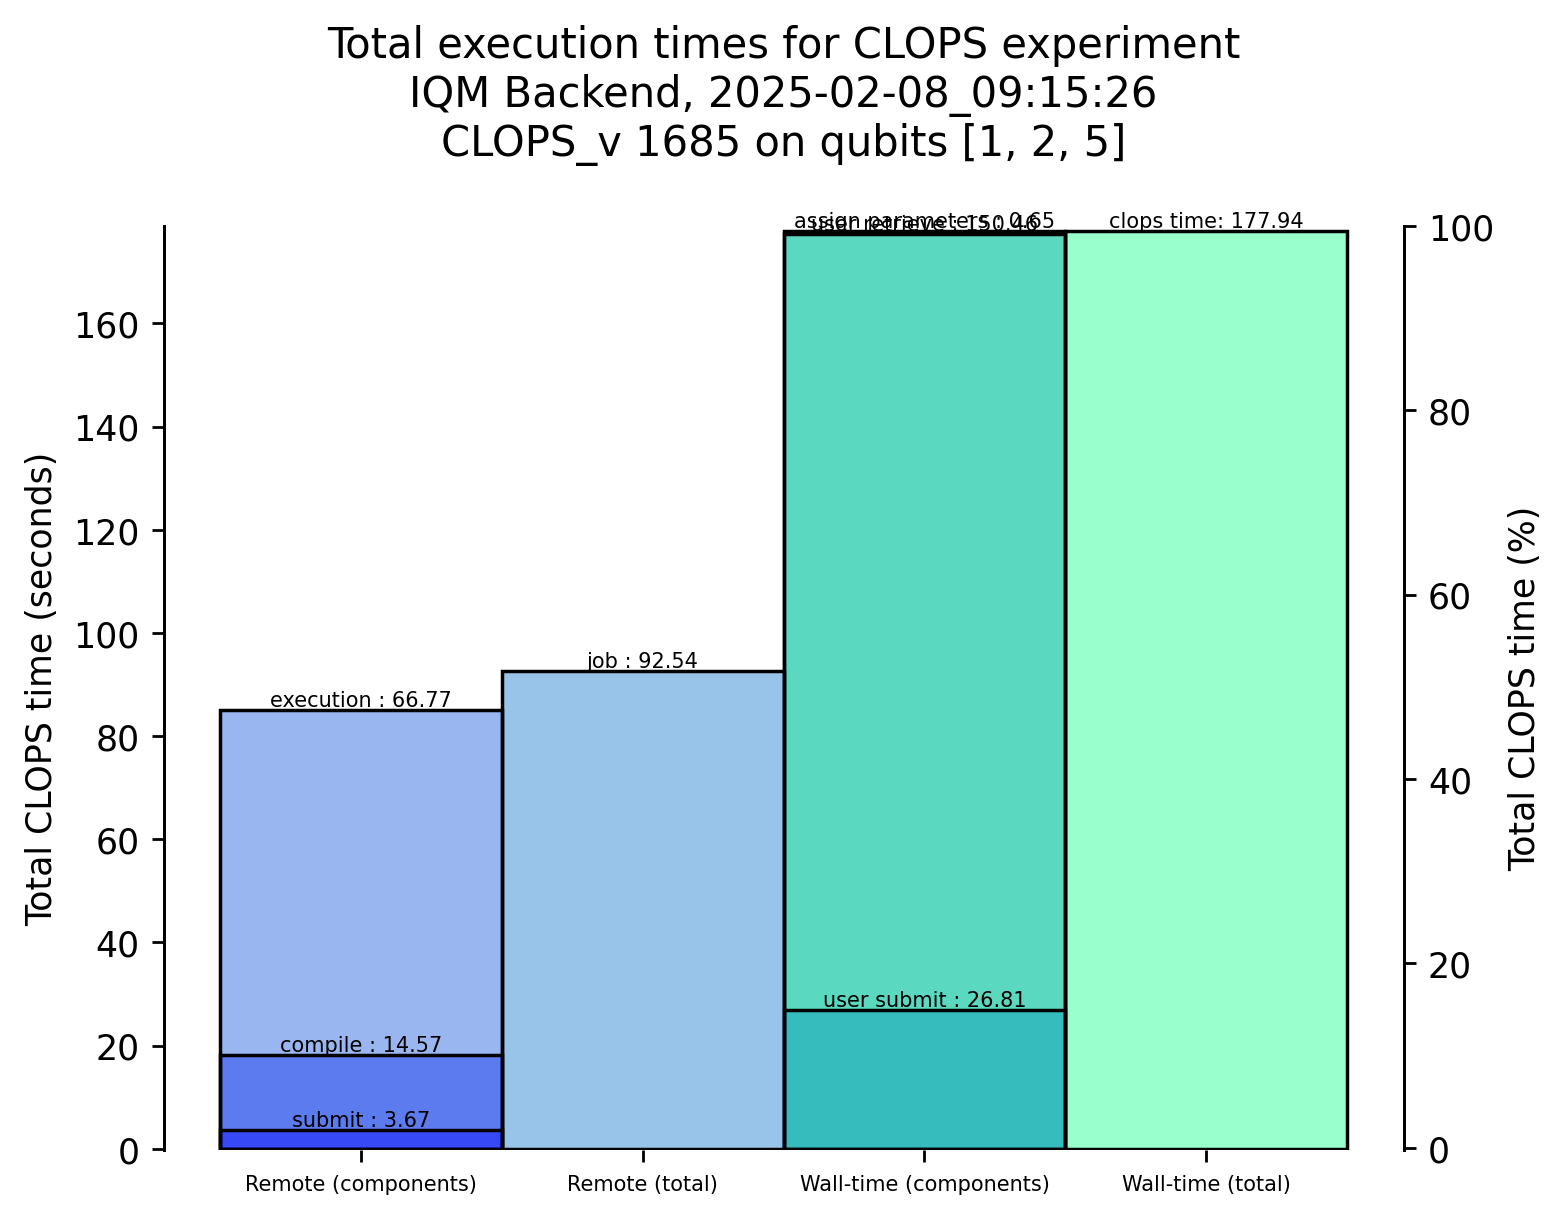

In [11]:
result_clops.plot_all()